<a href="https://colab.research.google.com/github/David-Gentil/Regressao-Linear_DNC/blob/main/Regress%C3%A3o_Linear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introdução

Vamos criar um modelo de regressão linear para prever o percentual de alunos aprovados em 2017, tendo como base os dados de aprovação de 2015 e 2016.

Faremos todo o processo de análise exploratória, preparação dos dados, treinamento de modelos e avaliação, seguindo as boas práticas de Ciência de Dados.

Inicialmente, entenderemos o contexto do problema e os dados disponíveis. Em seguida, realizaremos a análise exploratória, tratamento e preparação dos dados. Então, treinaremos modelos de regressão linear, avaliaremos seu desempenho e escolheremos o melhor modelo.

Por fim, utilizaremos o modelo escolhido para fazer a previsão solicitada e analisaremos o erro do modelo em relação aos dados reais.

##Entendendo o Problema e os Dados

Fomos contratados pelo Ministério da Educação para criar um modelo que permita prever o percentual de alunos que serão aprovados em 2017, tendo como base os dados de aprovação de 2015 e 2016.

Os dados disponíveis são justamente os percentuais de aprovação de alunos nos anos de 2015 e 2016. Não temos mais informações sobre os alunos ou sobre fatores que podem influenciar as taxas de aprovação.

Portanto, nosso objetivo é utilizar os dados históricos de aprovação para treinar um modelo de regressão linear que permita estimar a taxa de aprovação para o ano seguinte.

Vamos assumir que os dados representam alguma região ou nível de ensino específico, de forma que as taxas de aprovação de um ano para o outro tenham alguma correlação.

In [ ]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
#Carregando Dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Regressão Linear_Exercício 01/C├│pia de aprovacao_alunos (1).xlsx')
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [ ]:
#Verificando informações do Dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 780.0+ bytes


In [ ]:
#Verificando a descrição dos dados
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


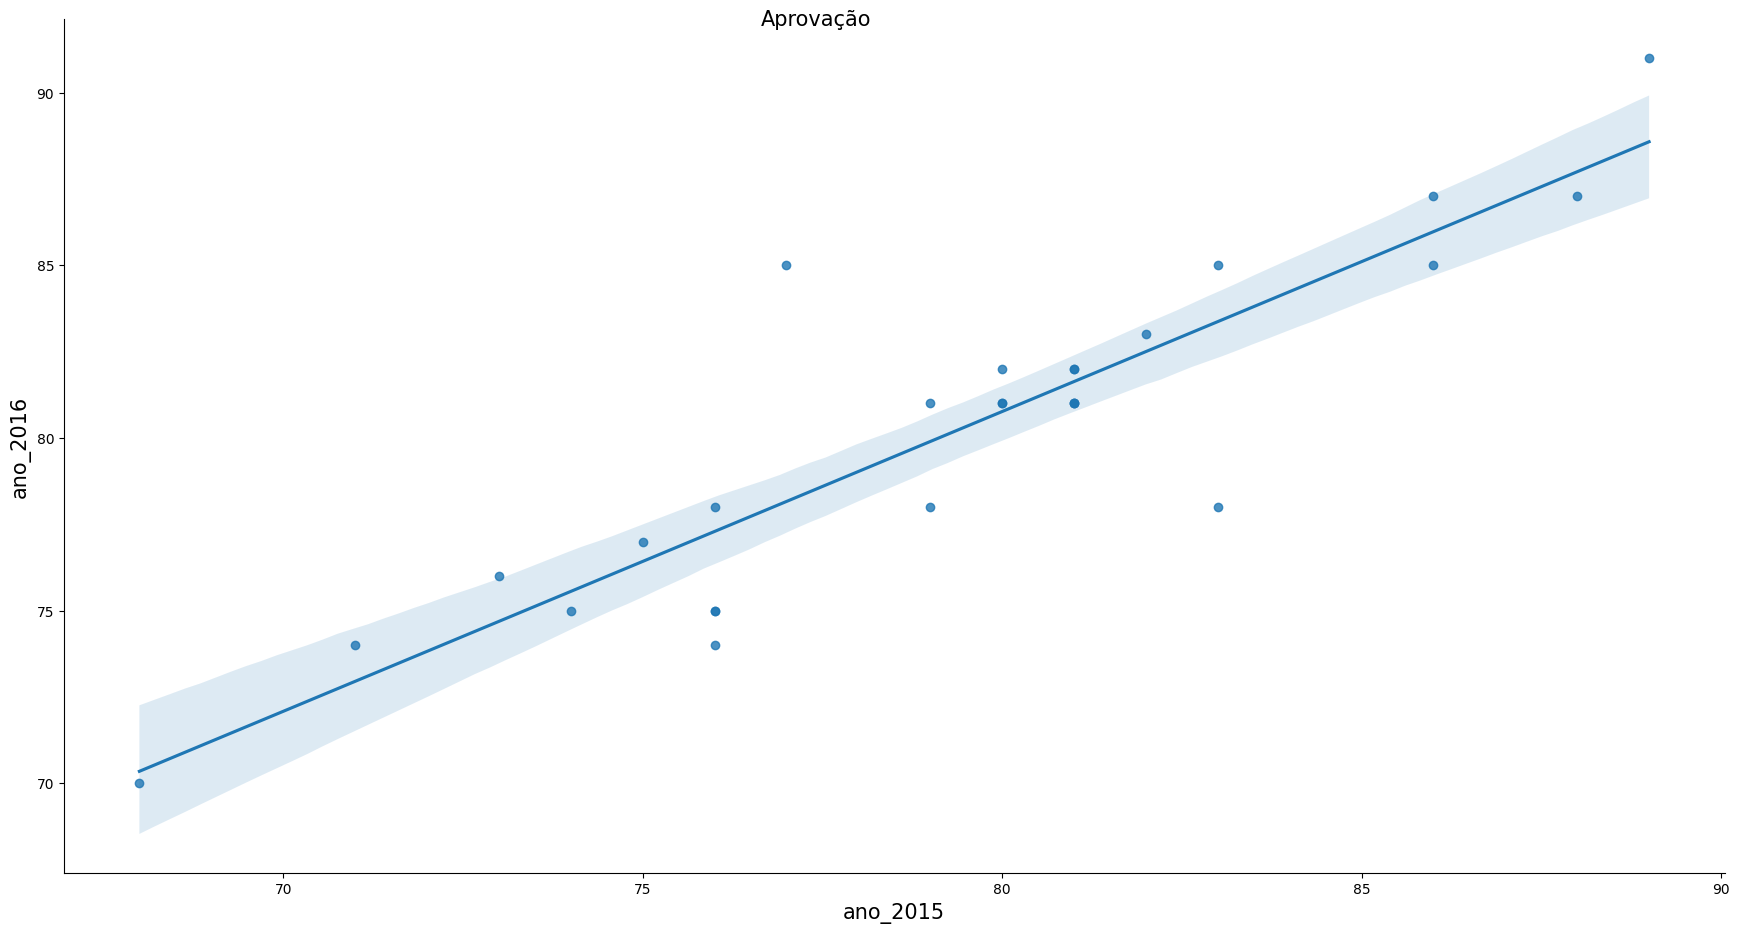

In [ ]:
#Plotando gráfico para verificar correlação gráfica entre os dados dos anos 2025 e 2026
ax = sns.lmplot(x='ano_2015', y='ano_2016', data=df)
ax.fig.set_size_inches(20, 10)
ax.fig.suptitle('Aprovação', fontsize=15)
ax.set_xlabels('ano_2015', fontsize=15)
ax.set_ylabels('ano_2016', fontsize=15)
ax;

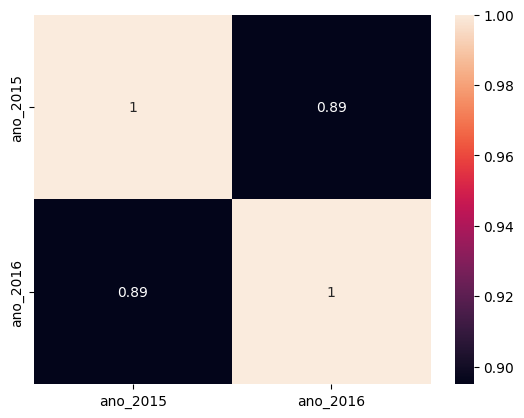

In [ ]:
#Plotando Heatmap para verificar as correlações númericas
sns.heatmap(df[['ano_2015', 'ano_2016']].corr(), annot=True);

In [ ]:
#Prevendo o Y em função do X
Y = df.ano_2016
X = sm.add_constant(df.ano_2015)
Y.head()

,ano_2016
0,85
1,81
2,85
3,82
4,76


In [ ]:
#Plotando o OLS
Regressão = sm.OLS(Y, X).fit()
print(Regressão.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Sun, 09 Mar 2025   Prob (F-statistic):           3.02e-10
Time:                        13:08:30   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
#Prevendo o Ano de 2017
df['ano_2017'] = Regressão.predict().astype(int)
df.head()

,UF,ano_2015,ano_2016,ano_2017
0,Rondonia,77,85,78
1,Acre,79,81,79
2,Amazonas,83,85,83
3,Roraima,81,82,81
4,Para,73,76,74


In [ ]:
#Calculando o Resíduos
df['residuos'] = df.ano_2017 - df.ano_2016
df.head()

,UF,ano_2015,ano_2016,ano_2017,residuos
0,Rondonia,77,85,78,-7
1,Acre,79,81,79,-2
2,Amazonas,83,85,83,-2
3,Roraima,81,82,81,-1
4,Para,73,76,74,-2
